In [73]:
from subprocess import Popen, PIPE, STDOUT
import os

def run(is_forest, acc_src, dataset_num, max_param):
    args = ["java", "-jar", "kotlin.jar"]
    p = Popen(args, stdout=PIPE, stdin=PIPE, stderr=STDOUT)
    if is_forest:
        input = "forest\n"
    else:
        input = "tree\n"
    input += acc_src + "\n" + str(dataset_num) + " " + str(max_param)
    p_stdout = p.communicate(input=bytes(input, encoding='utf-8'))[0]
    return p_stdout.decode('utf-8').strip().split()

In [94]:
max_possible_h = 15
min_h = (max_possible_h + 1, -1)
max_h = (0, -1)
tree_acc = []
for i in range(0, 21):
    accuracy = list(map(float, run(False, "all", i + 1, max_possible_h)))
    test_acc = [accuracy[i] for i in range(0, len(accuracy), 2)]
    train_acc = [accuracy[i] for i in range(1, len(accuracy), 2)]
    tree_acc.append([test_acc, train_acc])
    best_h = test_acc.index(max(test_acc)) + 1
    if best_h < min_h[0]:
        min_h = (best_h, i)
    if best_h > max_h[0]:
            max_h = (best_h, i)
    print("Dataset {}: height {} with accuracy {}".format(i + 1, best_h, test_acc[best_h - 1]))

Dataset 1: height 3 with accuracy 0.9994859933179131
Dataset 2: height 9 with accuracy 0.6455470737913486
Dataset 3: height 1 with accuracy 1.0
Dataset 4: height 5 with accuracy 0.9906086956521739
Dataset 5: height 1 with accuracy 0.9956709956709957
Dataset 6: height 3 with accuracy 0.9922737306843267
Dataset 7: height 3 with accuracy 0.9958139534883721
Dataset 8: height 2 with accuracy 0.997920997920998
Dataset 9: height 4 with accuracy 0.8137254901960784
Dataset 10: height 4 with accuracy 0.9935613682092556
Dataset 11: height 1 with accuracy 0.999195171026157
Dataset 12: height 7 with accuracy 0.8669660398540556
Dataset 13: height 7 with accuracy 0.6284403669724771
Dataset 14: height 6 with accuracy 0.9567734465457353
Dataset 15: height 1 with accuracy 1.0
Dataset 16: height 1 with accuracy 1.0
Dataset 17: height 7 with accuracy 0.8151870463428252
Dataset 18: height 5 with accuracy 0.9344750558451228
Dataset 19: height 7 with accuracy 0.8094523630907727
Dataset 20: height 7 with accu

In [95]:
print("Min height on {} dataset (h = {})".format(min_h[1] + 1, min_h[0]))
print("Max height on {} dataset (h = {})".format(max_h[1] + 1, max_h[0]))

Min height on 3 dataset (h = 1)
Max height on 21 dataset (h = 10)


In [98]:
max_possible_h = 20
min_h_accuracy = list(map(float, run(False, "all", min_h[1] + 1, max_possible_h)))
min_h_test_accuracy = [min_h_accuracy[i] for i in range(0, len(min_h_accuracy), 2)]
min_h_train_accuracy = [min_h_accuracy[i] for i in range(1, len(min_h_accuracy), 2)]

max_h_accuracy = list(map(float, run(False, "all", max_h[1] + 1, max_possible_h)))
max_h_test_accuracy = [max_h_accuracy[i] for i in range(0, len(max_h_accuracy), 2)]
max_h_train_accuracy = [max_h_accuracy[i] for i in range(1, len(max_h_accuracy), 2)]

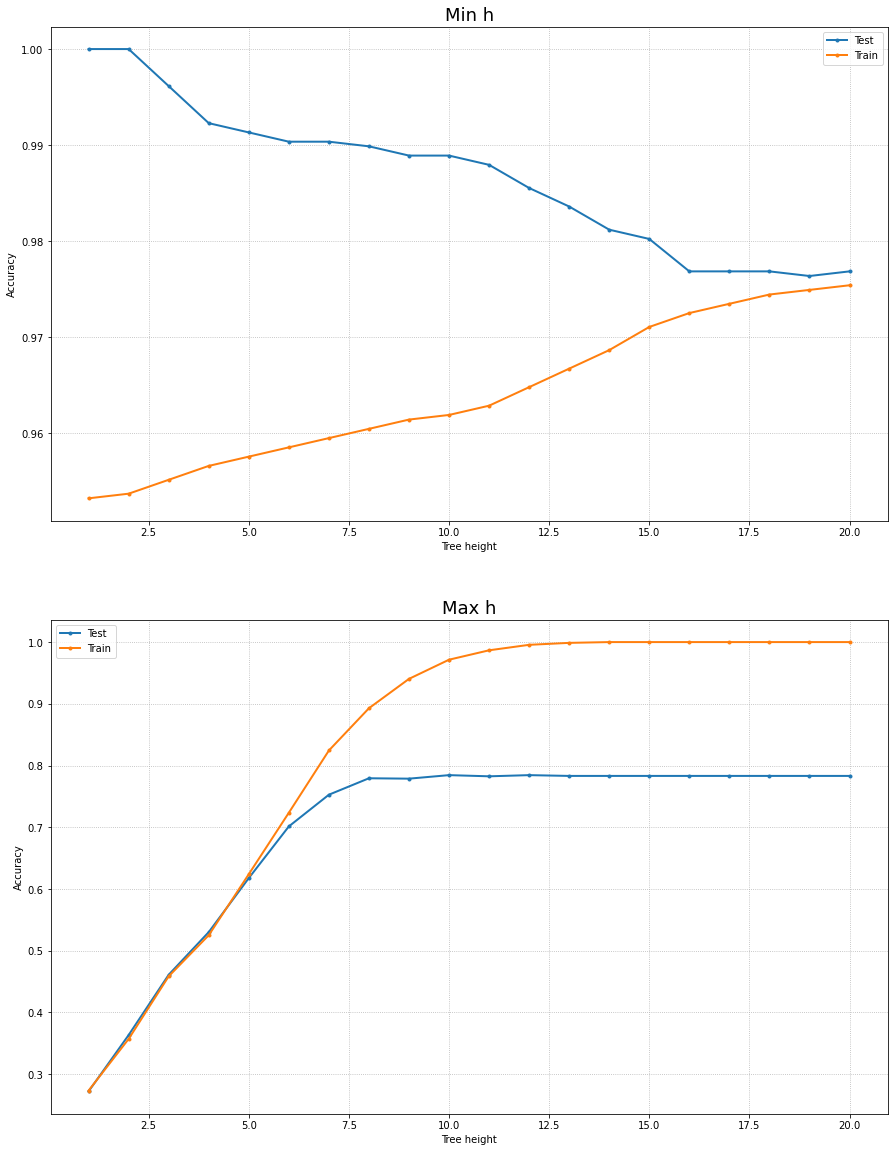

In [99]:
from matplotlib import pyplot as plt

rng = range(1, max_possible_h + 1)

fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(2, 1, 1)
ax.set_title("Min h", fontsize=18)
ax.plot(rng, min_h_test_accuracy, label='Test', lw=2, marker=".")
ax.plot(rng, min_h_train_accuracy, label='Train', lw=2, marker=".")
ax.set_xlabel('Tree height')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(linestyle=':')

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Max h", fontsize=18)
ax.plot(rng, max_h_test_accuracy, label='Test', lw=2, marker=".")
ax.plot(rng, max_h_train_accuracy, label='Train', lw=2, marker=".")
ax.set_xlabel('Tree height')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(linestyle=':')

In [92]:
max_possible_tree_cnt = 150
forest_acc = []
for i in range(0, 21):
    acc = list(map(float, run(True, "all", i + 1, max_possible_tree_cnt)))
    test_acc = [acc[i] for i in range(0, len(acc), 2)]
    train_acc = [acc[i] for i in range(1, len(acc), 2)]
    forest_acc.append([test_acc, train_acc])
    best_tree_cnt = test_acc.index(max(test_acc)) + 1
    print("Dataset {}: tree cnt {} with test accuracy {}".format(i + 1, best_tree_cnt, test_acc[best_tree_cnt - 1]))

Dataset 1: tree cnt 83 with test accuracy 0.9976869699306091
Dataset 2: tree cnt 150 with test accuracy 0.6027989821882952
Dataset 3: tree cnt 25 with test accuracy 0.9985535197685632
Dataset 4: tree cnt 148 with test accuracy 0.9860869565217392
Dataset 5: tree cnt 13 with test accuracy 0.9956709956709957
Dataset 6: tree cnt 74 with test accuracy 1.0
Dataset 7: tree cnt 117 with test accuracy 0.9846511627906976
Dataset 8: tree cnt 6 with test accuracy 0.9896049896049897
Dataset 9: tree cnt 143 with test accuracy 0.8313725490196079
Dataset 10: tree cnt 19 with test accuracy 0.999195171026157
Dataset 11: tree cnt 48 with test accuracy 0.9987927565392354
Dataset 12: tree cnt 97 with test accuracy 0.92843109738984
Dataset 13: tree cnt 127 with test accuracy 0.6064220183486239
Dataset 14: tree cnt 144 with test accuracy 0.975685063681976
Dataset 15: tree cnt 34 with test accuracy 0.9975975975975976
Dataset 16: tree cnt 24 with test accuracy 1.0
Dataset 17: tree cnt 121 with test accuracy 0.

In [105]:
def max_in(acc, i, ind):
    return max(acc[i][ind])

data = [[max(tree_acc[i][1]), 
         max(forest_acc[i][1]), 
         max(tree_acc[i][0]), 
         max(forest_acc[i][0])]
         for i in range(0, 21)]
pd.DataFrame(data, columns=["Tree train", "Forest train", "Tree test", "Forest test"])

,Tree train,Forest train,Tree test,Forest test
0,0.977898,1.0,0.999486,0.997687
1,0.989059,1.0,0.645547,0.602799
2,0.971070,1.0,1.000000,0.998554
3,0.984348,1.0,0.990609,0.986087
4,1.000000,1.0,0.995671,0.995671
5,0.989514,1.0,0.992274,1.000000
6,0.985116,1.0,0.995814,0.984651
7,1.000000,1.0,0.997921,0.989605
8,1.000000,1.0,0.813725,0.831373
9,0.994366,1.0,0.993561,0.999195
